In [1]:
pip install numpy pandas scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:

data = load_iris()
X = data.data  # Features: petal length, petal width, sepal length, sepal width
y = data.target  # Target variable: species (0 = setosa, 1 = versicolor, 2 = virginica)


In [3]:
# DataFrame for visualization
iris_df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names + ['species'])


In [4]:
# Select only petal length and sepal length as features
X = iris_df[['petal length (cm)', 'sepal length (cm)']].values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Creating a KNN classifier with k=3 
model = KNeighborsClassifier(n_neighbors=3)

# Training the model on the training data
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [7]:
# predictions on the test set
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



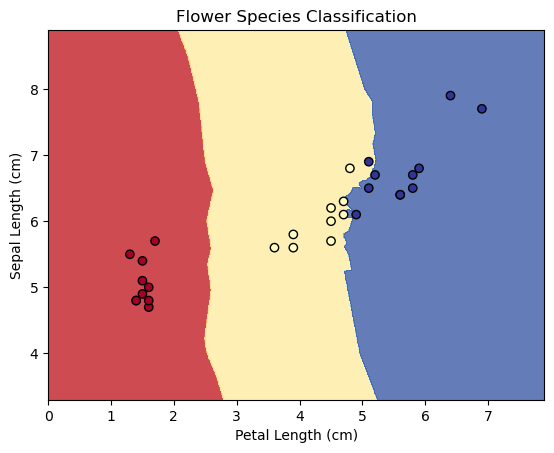

In [8]:
# Creating a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Flower Species Classification')
plt.show()
